### Use ColorCube Interactively and Persist It 

In [1]:
import os, sys, copy
sys.path.append("../")
%load_ext autoreload
%autoreload 2
import cv2
import numpy as np
import pickle

In [2]:
from matplotlib import pyplot as plt
%matplotlib notebook

In [3]:
from modules.Interproc import DBInterface
from modules.Interproc import GuiviewState

In [4]:
from modules.AnalysisHelpers import ( imgToColors
                                     ,channelsToColorStr
                                     ,cvtPlot
                                    )
from modules.AnalysisHelpers import colorCube
from modules.AnalysisHelpers import SubprocColorCube
from modules.AnalysisHelpers import subprocColorCube

##### Load Book Data

In [5]:
DATA_DIR = "../data/misc/books/demo-colorcube-1/"

In [6]:
gsDb = DBInterface(os.path.join(DATA_DIR,"interproc.db"))
gs = pickle.loads(gsDb.selectLatest()[0][1])

<IPython.core.display.Javascript object>


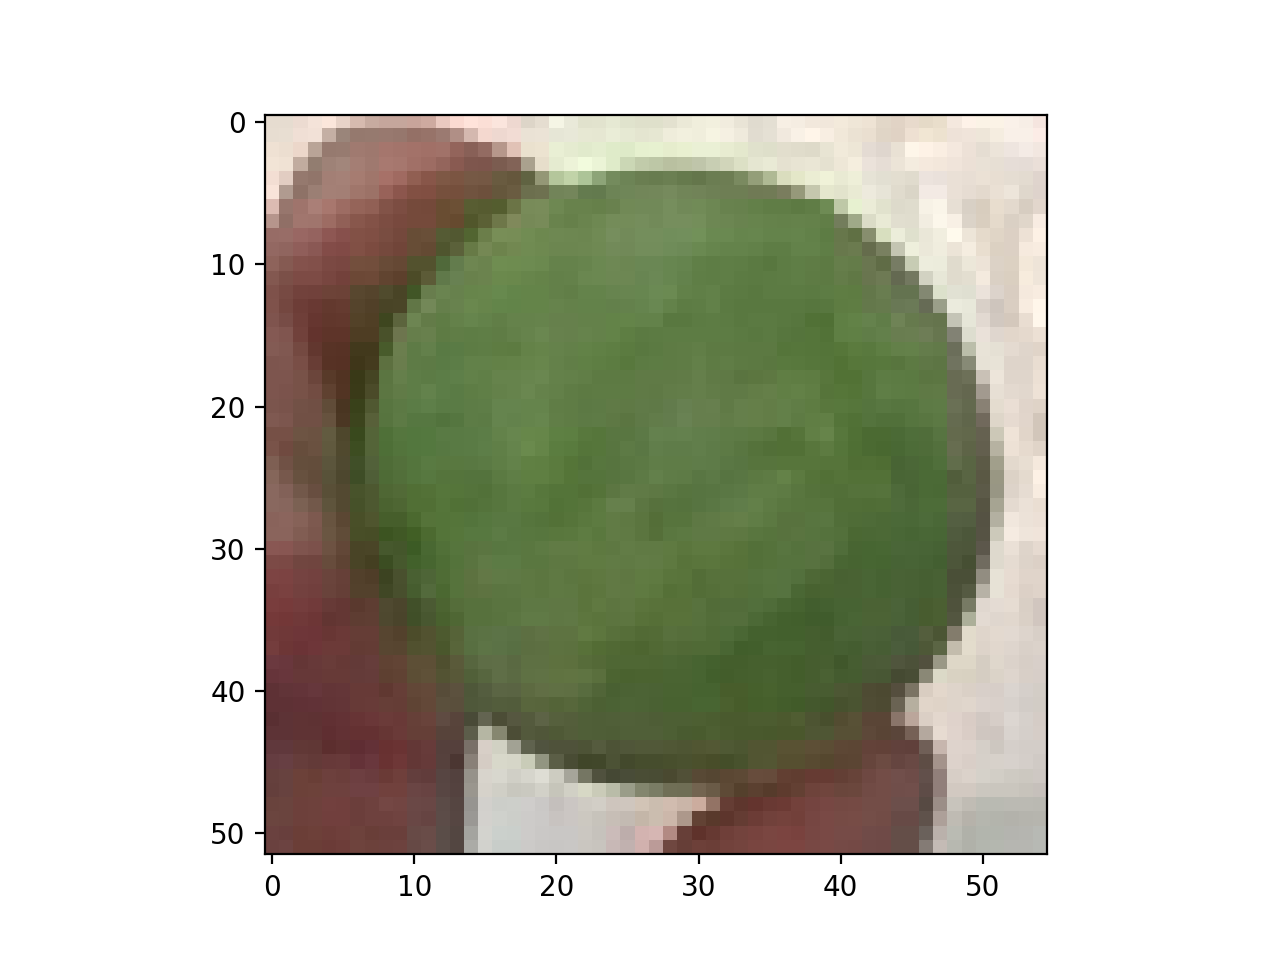

In [7]:
plt.close()
gs.initDisplay()
cvtPlot(gs.getOrigFrame())
plt.show()
cvtPlot(gs.getZoomWindow())

In [8]:
gs.initDisplay()

img = gs.getZoomWindow()

colorData = imgToColors(img, sampleN = 500)

listB, listG, listR = colorData

### Use colorPlot() in a simple way

This will display the plot interactively (for %matplotlib notebook), but only responsively at low sampleN (<500). Therefore we ameliorate this in next step

In [9]:
%matplotlib notebook

<IPython.core.display.Javascript object>


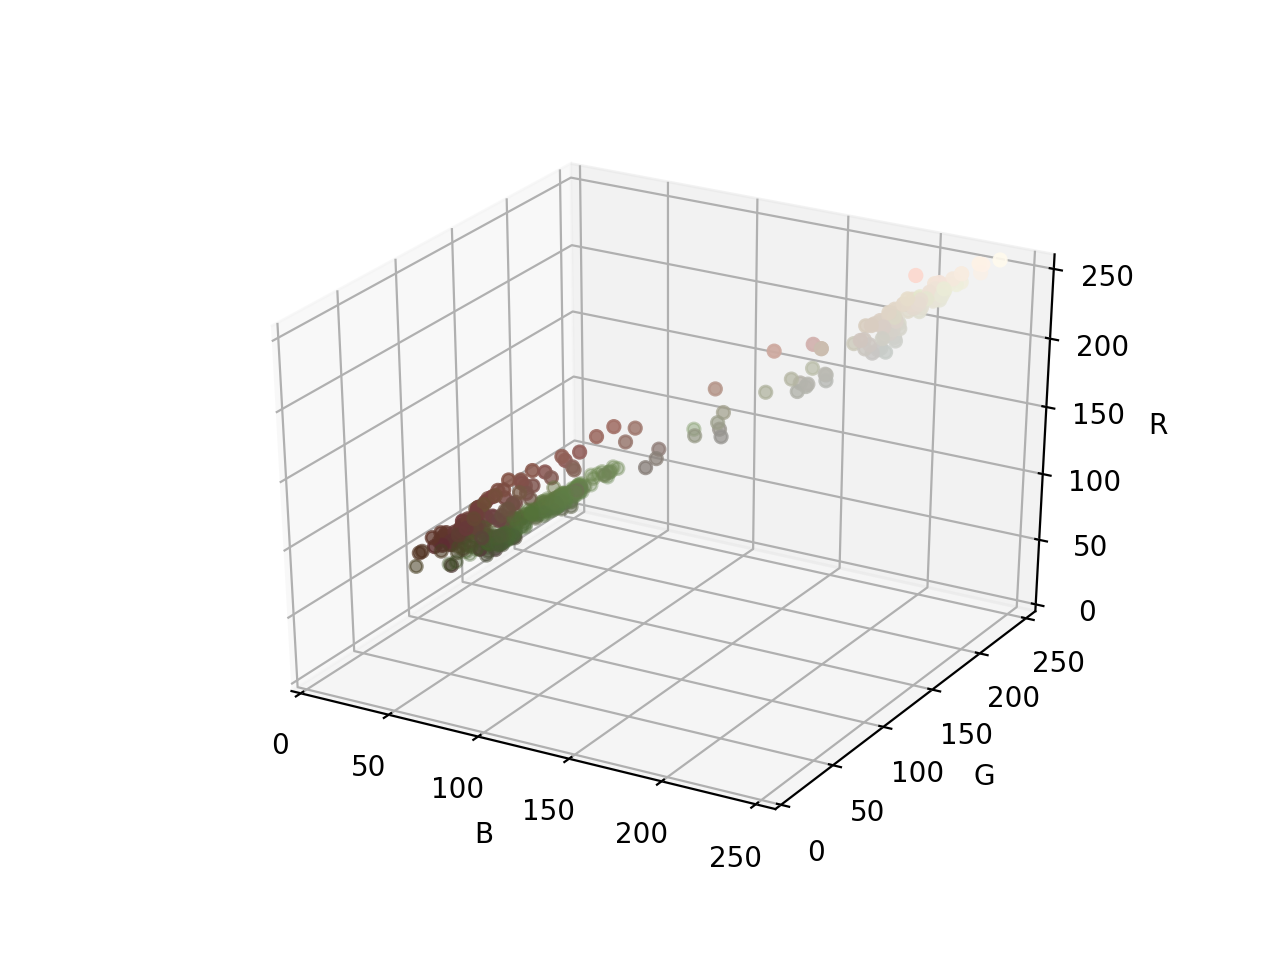

In [10]:
plt.close()
colorCube(listB, listG, listR, 
                 listColors = channelsToColorStr(*colorData))

### Do Interactivty Outside Notebook

In [11]:
#first, output the current ColorCube instance
#in regular analysis, dbPathFn does not be set and will default to data/usr
subprocColorCube(listB, listG, listR, 
                 listColors = channelsToColorStr(*colorData),
                 dbPathFn = os.path.join(DATA_DIR, "interproc_colorcube.db")
                )

Now, run from cmd (in modules/): python AnalysisHelpers.py --subprocColorCube --dbpathfn ../data/misc/books/demo-colorcube-1/interproc_colorcube.db .

You'll see the plot in a separate windows, rotate it to desired place, then (making sure focus is on Matplot window) press the key 'o' which will output the view-position param's - elevation and azimuth

In [12]:
# Now you'll reload the visualiztion
p = SubprocColorCube(dbPathFn = os.path.join(DATA_DIR, 
                                    "interproc_colorcube.db")
                    )
p.load()    #TODO - get particular id from interproc_colorcube.db
#TODO - add more data points (to loaded class?)

loaded class type:  SubprocColorCube


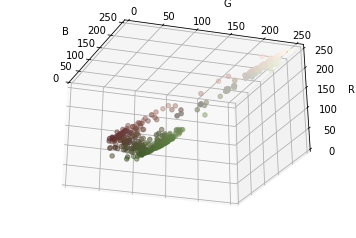

In [13]:
#Here you'll see the rotated colorPlot with same data
%matplotlib inline
p.callPlot()

In [14]:
# these are the params added from the output of your interaction
print p.loadedClass.azimuth
print p.loadedClass.elevation

-20.080645161290306
-30.8766233766234


### Other Notes

by default, interproc_colorcube.db is in data/usr

delete all records/delete the db itself, add you desired records, then copy the db and paste into a particular book's data folder

this is an easy way to save complex plt config data

also, can always completely delete the db to reset it as it auto-inits

working with pickle can be tricky if you change the class definition for SubprocColorPlot you can't use load old states saved to db